### Exploratory Data Analysis of Electric Vehicles (EV) Dataset

The goal of the analysis is to compare the features and analyse the benefits of electric vehicles. Data analysis and data visualization techniques are used to achieve this goal. The results obtained are documented.

### Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

### Define functions required for plotting graphs

In [3]:
# Correlation matrix

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

In [4]:
# Scatter and density plots

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

### Read the dataset

In [5]:
nRowsRead = None 
df1 = pd.read_csv('ElectricCarData_Clean.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'ElectricCarData_Clean.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 103 rows and 14 columns


In [6]:
df1.dataframeName = 'ElectricCarData_Clean.csv'

In [7]:
df1.head(5)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


### Dataset Description

The dataset 'One Electric Vehicle Dataset' contains 103 rows and 14 columns. The 14 columns contain data that describe the various features of the electric vehicles.

#### Description of the columns:
1. Brand - String value representing the name of the EV brand
2. Model - String value representing the name of the EV model
3. AccelSec - Numeric value denoting the kmph acceleration time of the EV (in seconds)
4. TopSpeed_KmH - Numeric value denoting the maximum speed the EV can reach (in Kmph)
5. Range_Km -  Numeric value denoting the range of the EV (in Km)
6. Efficiency_WhKm - Numeric value denoting the efficinecy of the EV (in WhKm)
7. FastCharge_KmH - Numeric value denoting the fast charge of the EV (in KmH)
8. RapidCharge - String value representing the presence/absence of rapid charge feature in the EV (Yes/No)
9. PowerTrain - String value representing the type of powertrain of the EV
10. PlugType - String value representing the plug type of the EV
11. BodyStyle - String value representing the body style of the EV
12. Segment - String value representing the segment type of the EV
13. Seats - Numeric value denoting the number of seats present in the EV
14. PriceEuro - Numeric value denoting the price of the EV (in Euros)

### Data Pre-processing

#### Renaming the columns
The following columns have been renamed for better understanding:
1. AccelSec - Acceleration
2. TopSpeed_KmH - TopSpeed
3. Range_Km - Range
4. Efficiency_WhKm - Efficiency
5. FastCharge_KmH - FastCharge

In [8]:
df1 = df1.rename(columns={'AccelSec':'Acceleration','TopSpeed_KmH':'TopSpeed','Range_Km':'Range','Efficiency_WhKm':'Efficiency','FastCharge_KmH':'FastCharge'})

#### Display the first 5 and last 5 columns of the dataframe

In [9]:
df1.head(5)

,Brand,Model,Acceleration,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [10]:
df1.tail(5)

,Brand,Model,Acceleration,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,Yes,AWD,Type 2 CCS,SUV,E,5,62000


#### Check the datatypes and null values

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         103 non-null    object 
 1   Model         103 non-null    object 
 2   Acceleration  103 non-null    float64
 3   TopSpeed      103 non-null    int64  
 4   Range         103 non-null    int64  
 5   Efficiency    103 non-null    int64  
 6   FastCharge    103 non-null    object 
 7   RapidCharge   103 non-null    object 
 8   PowerTrain    103 non-null    object 
 9   PlugType      103 non-null    object 
 10  BodyStyle     103 non-null    object 
 11  Segment       103 non-null    object 
 12  Seats         103 non-null    int64  
 13  PriceEuro     103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


#### Show the basic summary statistics

In [12]:
df1.describe()

,Acceleration,TopSpeed,Range,Efficiency,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


#### Find the shape of the dataset

In [13]:
df1.shape

(103, 14)

#### Find duplicate and missing values

In [14]:
#to find duplicate values
duplicate_rows1=df1[df1.duplicated()]
duplicate_rows1.shape

(0, 14)

In [15]:
#to find the missing values
print(df1.isnull().sum())

Brand           0
Model           0
Acceleration    0
TopSpeed        0
Range           0
Efficiency      0
FastCharge      0
RapidCharge     0
PowerTrain      0
PlugType        0
BodyStyle       0
Segment         0
Seats           0
PriceEuro       0
dtype: int64


#### Detecting outliers

Boxplot to detect outliers in PriceEuro column


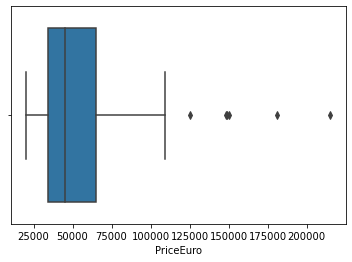

In [16]:
sn.boxplot(x=df1['PriceEuro'])
print('Boxplot to detect outliers in PriceEuro column')

Boxplot to detect outliers in Acceleration column


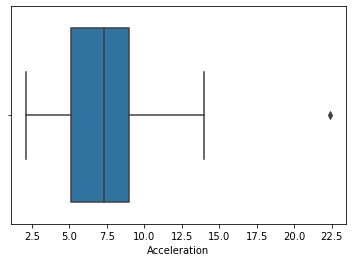

In [17]:
sn.boxplot(x=df1['Acceleration'])
print('Boxplot to detect outliers in Acceleration column')

Boxplot to detect outliers in Range column


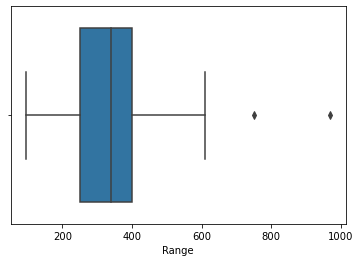

In [18]:
sn.boxplot(x=df1['Range'])
print('Boxplot to detect outliers in Range column')

Boxplot to detect outliers in TopSpeed column


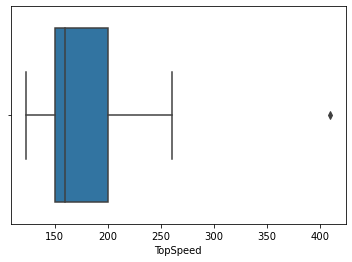

In [19]:
sn.boxplot(x=df1['TopSpeed'])
print('Boxplot to detect outliers in TopSpeed column')

Boxplot to detect outliers in Efficiency column


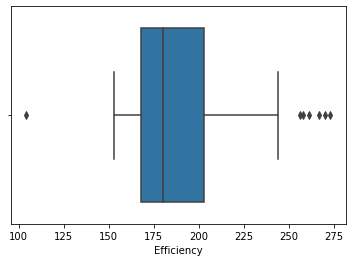

In [20]:
sn.boxplot(x=df1['Efficiency'])
print('Boxplot to detect outliers in Efficiency column')

The outliers detected in the 'PriceEuro', 'Acceleration', 'Range', 'TopSpeed', 'Efficiency' columns have not been removed in the further analysis in order to avoid affecting the quality of the analysis.

### Analysing and Visualising the data

#### Average values

In [21]:
#avg values
avg_val = df1.groupby(['Brand']).mean().round()
print(avg_val)

             Acceleration  TopSpeed  Range  Efficiency  Seats  PriceEuro
Brand                                                                   
Aiways                9.0     150.0  335.0       188.0    5.0    36057.0
Audi                  6.0     200.0  357.0       225.0    5.0    80594.0
BMW                   6.0     172.0  319.0       178.0    4.0    53146.0
Byton                 7.0     190.0  372.0       235.0    5.0    59833.0
CUPRA                 6.0     160.0  425.0       181.0    4.0    45000.0
Citroen              10.0     150.0  250.0       180.0    5.0    40000.0
DS                    9.0     150.0  250.0       180.0    5.0    37422.0
Fiat                  9.0     150.0  250.0       168.0    4.0    36400.0
Ford                  6.0     180.0  395.0       202.0    5.0    54569.0
Honda                 9.0     145.0  170.0       168.0    4.0    34459.0
Hyundai               9.0     162.0  302.0       156.0    5.0    36408.0
Jaguar                5.0     200.0  365.0       23

#### Analysis of EV Brands

In [22]:
unique_brands = df1['Brand'].nunique()
print("The dataset contains " + str(unique_brands) + " unique brands")

The dataset contains 33 unique brands


In [23]:
brand_name = df1.Brand.unique()
print('The following list shows the names of the brands\n')
print(*sorted(brand_name),sep='\n')

The following list shows the names of the brands

Aiways 
Audi 
BMW 
Byton 
CUPRA 
Citroen 
DS 
Fiat 
Ford 
Honda 
Hyundai 
Jaguar 
Kia 
Lexus 
Lightyear 
Lucid 
MG 
Mazda 
Mercedes 
Mini 
Nissan 
Opel 
Peugeot 
Polestar 
Porsche 
Renault 
SEAT 
Skoda 
Smart 
Sono 
Tesla 
Volkswagen 
Volvo 


In [24]:
print('Number of vehicles in each brand\n')
brand_count = df1['Brand'].value_counts()
print(brand_count)

Number of vehicles in each brand

Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Porsche         5
Kia             5
Renault         5
Ford            4
BMW             4
Smart           3
Opel            3
Hyundai         3
Mercedes        3
Byton           3
Honda           2
Peugeot         2
Fiat            2
Lexus           1
Mini            1
SEAT            1
Volvo           1
DS              1
Lightyear       1
Jaguar          1
Lucid           1
MG              1
Citroen         1
Mazda           1
CUPRA           1
Polestar        1
Sono            1
Aiways          1
Name: Brand, dtype: int64


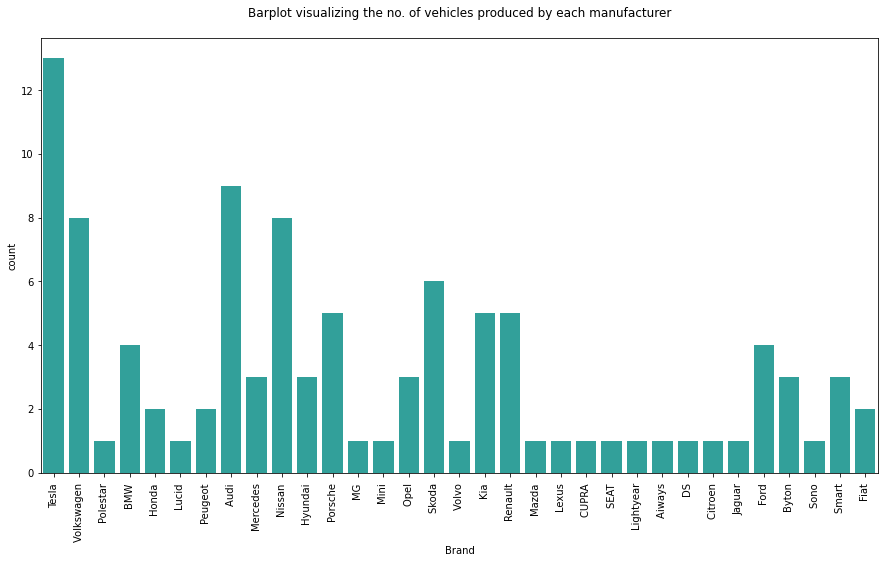

In [25]:
#Barplot visualizing the no. of vehicles produced by each manufacturer
fig = plt.figure(figsize = (15, 8))
sn.countplot(x='Brand',data=df1,color = 'lightseagreen')
plt.title('Barplot visualizing the no. of vehicles produced by each manufacturer\n')
plt.xticks(rotation = 90)
plt.show()

#### Inference:

Tesla has produced the most number of vehicles while 15 brands have produced the least number of vehicles.

In [26]:
#Pie chart depicting the top 10 most represented brands
top = brand_count[:10]
brand_count_dict = top.to_dict()
print(brand_count_dict)

{'Tesla ': 13, 'Audi ': 9, 'Nissan ': 8, 'Volkswagen ': 8, 'Skoda ': 6, 'Porsche ': 5, 'Kia ': 5, 'Renault ': 5, 'Ford ': 4, 'BMW ': 4}


In [1]:
labels = list(brand_count_dict.keys())
values = list(brand_count_dict.values())
plt.pie(values, labels = labels, shadow = True, explode = [0.1,0,0,0,0,0,0,0,0,0], colors = ['darkviolet','indigo','deepskyblue','forestgreen','yellow','orange','red','plum','lightcoral','magenta'])
plt.axis('equal')
plt.title('Pie chart depicting the top 10 most represented brands\n')
plt.show()

NameError: name 'brand_count_dict' is not defined

#### Analysis of Models, Styles, Segments and Seats

In [28]:
model = df1['Model'].nunique()
print('The total number of unique models available: ' + str(model) + '\n')

The total number of unique models available: 102



In [29]:
model_name = df1['Model'].unique()
print('The unique models available:\n')
print(model_name)

The unique models available:

['Model 3 Long Range Dual Motor' 'ID.3 Pure' '2' 'iX3 ' 'e ' 'Air '
 'e-Golf ' 'e-208 ' 'Model 3 Standard Range Plus' 'Q4 e-tron '
 'EQC 400 4MATIC' 'Leaf ' 'Kona Electric 64 kWh' 'i4 ' 'IONIQ Electric'
 'ID.3 Pro S' 'Taycan Turbo S' 'e-Up! ' 'ZS EV' 'Cooper SE ' 'Corsa-e '
 'Model Y Long Range Dual Motor' 'Enyaq iV 50' 'e-tron GT '
 'Model 3 Long Range Performance' 'ID.4 ' 'ID.3 Pro'
 'XC40 P8 AWD Recharge' 'i3 120 Ah' 'e-2008 SUV ' 'e-tron 50 quattro'
 'e-Niro 64 kWh' 'Zoe ZE50 R110' 'Cybertruck Tri Motor' 'MX-30 ' 'Leaf e+'
 'UX 300e' 'el-Born ' 'Zoe ZE50 R135' 'EQA ' 'Model S Long Range'
 'Kona Electric 39 kWh' 'e-tron Sportback 55 quattro' 'CITIGOe iV '
 'Mii Electric ' 'e-Soul 64 kWh' 'Ampera-e ' 'Taycan 4S' 'One ' 'U5 '
 'e-tron 55 quattro' 'Roadster ' 'Mokka-e ' 'Enyaq iV 80'
 'Model X Long Range' 'e Advance' '3 Crossback E-Tense' 'Twingo ZE'
 'e-C4 ' 'Model S Performance' 'Zoe ZE40 R110'
 'Model Y Long Range Performance' 'Ariya 87kWh' 'I-Pace '
 '

In [30]:
mod = df1.groupby('Brand')['Model'].value_counts()
print(mod)

Brand        Model               
Aiways       U5                      1
Audi         Q4 Sportback e-tron     1
             Q4 e-tron               1
             e-tron 50 quattro       1
             e-tron 55 quattro       1
                                    ..
Volkswagen   ID.3 Pure               1
             ID.4                    1
             e-Golf                  1
             e-Up!                   1
Volvo        XC40 P8 AWD Recharge    1
Name: Model, Length: 102, dtype: int64


#### Inference:

It can be seen that almost every brand produces multiple models of electric vehicles.

In [31]:
#number of vehicles present in each vehicle style
style = df1.BodyStyle.unique()
print('List of various vehicle styles manufactured:')
print(*sorted(style),sep = '\n')

List of various vehicle styles manufactured:
Cabrio
Hatchback
Liftback
MPV
Pickup
SPV
SUV
Sedan
Station


In [32]:
stylecount = df1['BodyStyle'].value_counts()
print('The number of vehicles present in each vehicle style:\n')
print(stylecount)

The number of vehicles present in each vehicle style:

SUV          45
Hatchback    32
Sedan        10
Liftback      5
SPV           3
Pickup        3
Cabrio        3
Station       1
MPV           1
Name: BodyStyle, dtype: int64


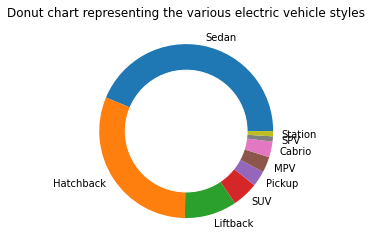

In [33]:
plt.pie(stylecount, labels = style)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut chart representing the various electric vehicle styles')
plt.show()

#### Inference:

Sedan and Hatchback are the most produced vehicle styles.

In [34]:
#number of vehicles produced in each segment
seg = df1.groupby('Brand')['Segment'].value_counts()
print('The number of vehicles produced in each segment grouped by brands\n')
print(seg)

The number of vehicles produced in each segment grouped by brands

Brand        Segment
Aiways       C          1
Audi         E          6
             D          2
             F          1
BMW          B          2
             D          2
Byton        E          3
CUPRA        C          1
Citroen      C          1
DS           B          1
Fiat         B          2
Ford         D          4
Honda        B          2
Hyundai      B          2
             C          1
Jaguar       E          1
Kia          B          3
             C          2
Lexus        C          1
Lightyear    F          1
Lucid        F          1
MG           B          1
Mazda        C          1
Mercedes     C          1
             D          1
             N          1
Mini         B          1
Nissan       C          7
             N          1
Opel         B          3
Peugeot      B          2
Polestar     D          1
Porsche      F          5
Renault      B          3
             A          1
  

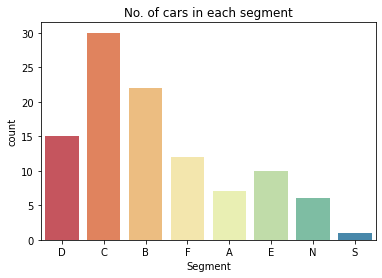

In [33]:
sn.countplot(x='Segment',data=df1,palette='Spectral')
plt.title('No. of cars in each segment')
plt.show()

#### Inference:

Most of the vehicles produced belong to the C segment.

A low number of vehicles are produced in the S segment.

In [34]:
#number of seats present in the vehicles
seat = df1.groupby('Brand')['Seats'].value_counts()
print('The number of seats present in the vehicles produced by each brand\n')
print(seat)

The number of seats present in the vehicles produced by each brand

Brand        Seats
Aiways       5        1
Audi         5        8
             4        1
BMW          4        2
             5        2
Byton        5        3
CUPRA        4        1
Citroen      5        1
DS           5        1
Fiat         4        2
Ford         5        4
Honda        4        2
Hyundai      5        3
Jaguar       5        1
Kia          5        5
Lexus        5        1
Lightyear    5        1
Lucid        5        1
MG           5        1
Mazda        5        1
Mercedes     5        2
             7        1
Mini         4        1
Nissan       5        7
             7        1
Opel         5        3
Peugeot      5        2
Polestar     5        1
Porsche      4        5
Renault      5        4
             4        1
SEAT         4        1
Skoda        5        5
             4        1
Smart        2        2
             4        1
Sono         5        1
Tesla        5        5
 

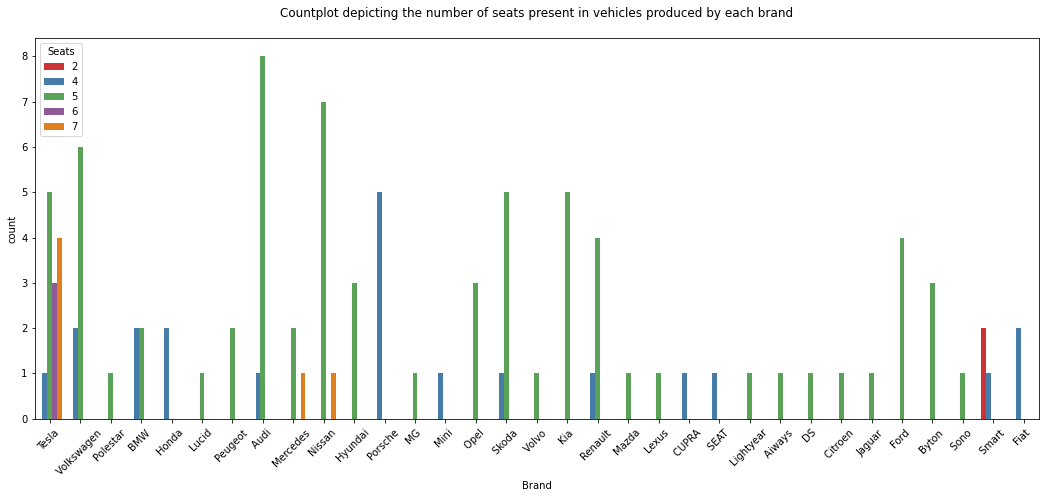

In [35]:
fig = plt.figure(figsize = (18, 7))
plt.xticks(rotation = 45)
sn.countplot(x='Brand',hue='Seats',data=df1,palette='Set1')
plt.title('Countplot depicting the number of seats present in vehicles produced by each brand\n')
plt.show()

#### Inference:

Audi produces the most number of 5-seater vehicles.

Tesla has produced 4-seater, 5-seater, 6-seater and 7-seater vehicles.

Smart is the only brand to have produced 2-seater vehicles.

Most brands produce 5-seater vehicles.

#### Analysis of Plug type and Power train

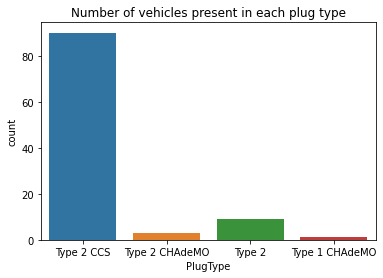

In [52]:
#Number of vehicles present in each plug type
sn.countplot(x='PlugType',data=df1)
plt.title('Number of vehicles present in each plug type')
plt.show()

#### Inference:

A large number of vehicles belong to 'Type 2 CCS'.

Very less number of vehicles belong to 'Type 1 CHAdeMO'

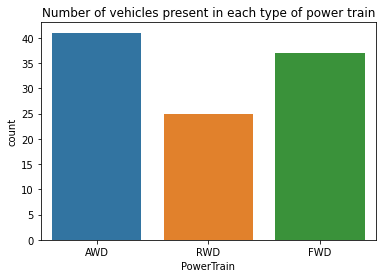

In [51]:
#Number of vehicles present in each type of power train
sn.countplot(x='PowerTrain',data=df1)
plt.title('Number of vehicles present in each type of power train')
plt.show()

#### Inference:
    
All Wheel Drive (AWD) is the most common type of power train followed by Front Wheel Drive (FWD) and Rear Wheel Drive (RWD).

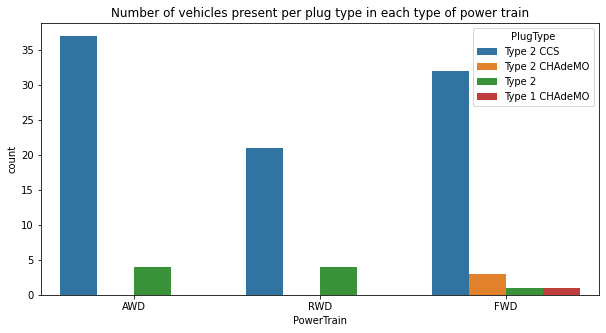

In [56]:
#vehicles present per plug type in each type of power train
fig = plt.figure(figsize = (10, 5))
sn.countplot(x='PowerTrain',hue='PlugType',data=df1)
plt.title('Number of vehicles present per plug type in each type of power train')
plt.show()

#### Analysis of Range, Efficiency and Rapid charge

In [38]:
#vehicle with the highest and lowest range
high_range = df1.loc[df1['Range'].idxmax()]
low_range = df1.loc[df1['Range'].idxmin()]
print('Specifications of the vehicle with the highest range in km:\n')
print(high_range,'\n')
print('Specifications of the vehicle with the lowest range in km:\n')
print(low_range)

Specifications of the vehicle with the highest range in km:

Brand               Tesla 
Model            Roadster 
Acceleration           2.1
TopSpeed               410
Range                  970
Efficiency             206
FastCharge             920
RapidCharge            Yes
PowerTrain             AWD
PlugType        Type 2 CCS
BodyStyle           Cabrio
Segment                  S
Seats                    4
PriceEuro           215000
Name: 51, dtype: object 

Specifications of the vehicle with the lowest range in km:

Brand                Smart 
Model           EQ forfour 
Acceleration           12.7
TopSpeed                130
Range                    95
Efficiency              176
FastCharge                -
RapidCharge              No
PowerTrain              RWD
PlugType             Type 2
BodyStyle         Hatchback
Segment                   A
Seats                     4
PriceEuro             22030
Name: 77, dtype: object


#### Inference:

Tesla Roadster has the highest range of 970 Km.

Smart EQ forfour has the lowest range of 95 Km.

In [62]:
#average range
print('The average range of each brand:\n')
print(avg_val['Range'].sort_values(ascending=False))

The average range of each brand:

Brand
Lucid          610.0
Lightyear      575.0
Tesla          501.0
CUPRA          425.0
Polestar       400.0
Ford           395.0
Porsche        388.0
Volvo          375.0
Byton          372.0
Jaguar         365.0
Audi           357.0
Mercedes       350.0
Skoda          338.0
Aiways         335.0
Nissan         328.0
BMW            319.0
Volkswagen     318.0
Kia            313.0
Hyundai        302.0
Opel           288.0
Lexus          270.0
Peugeot        262.0
Fiat           250.0
DS             250.0
Citroen        250.0
Renault        234.0
Sono           225.0
MG             220.0
SEAT           195.0
Mini           185.0
Mazda          180.0
Honda          170.0
Smart           97.0
Name: Range, dtype: float64


In [64]:
#average range of each brand
range_dict = avg_val['Range'].to_dict()
print(range_dict)

{'Aiways ': 335.0, 'Audi ': 357.0, 'BMW ': 319.0, 'Byton ': 372.0, 'CUPRA ': 425.0, 'Citroen ': 250.0, 'DS ': 250.0, 'Fiat ': 250.0, 'Ford ': 395.0, 'Honda ': 170.0, 'Hyundai ': 302.0, 'Jaguar ': 365.0, 'Kia ': 313.0, 'Lexus ': 270.0, 'Lightyear ': 575.0, 'Lucid ': 610.0, 'MG ': 220.0, 'Mazda ': 180.0, 'Mercedes ': 350.0, 'Mini ': 185.0, 'Nissan ': 328.0, 'Opel ': 288.0, 'Peugeot ': 262.0, 'Polestar ': 400.0, 'Porsche ': 388.0, 'Renault ': 234.0, 'SEAT ': 195.0, 'Skoda ': 338.0, 'Smart ': 97.0, 'Sono ': 225.0, 'Tesla ': 501.0, 'Volkswagen ': 318.0, 'Volvo ': 375.0}


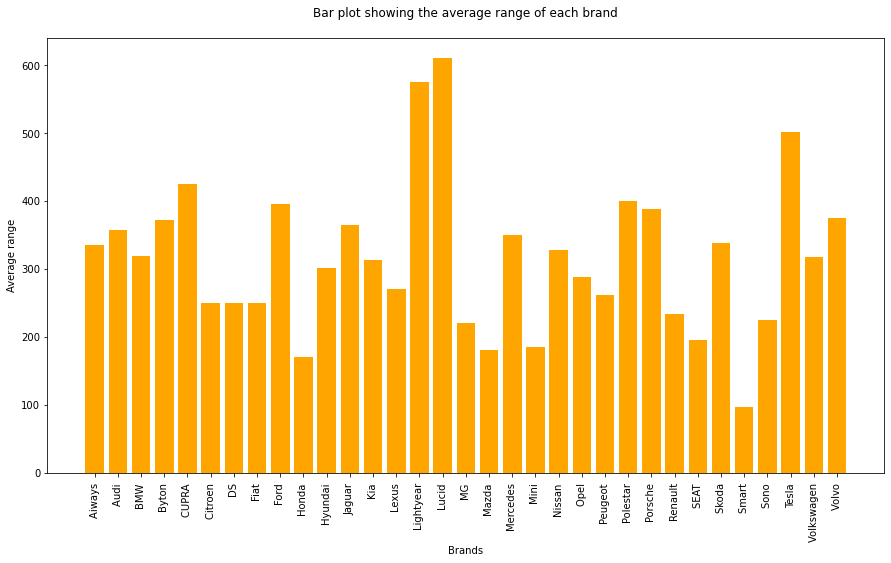

In [68]:
br_ran = list(range_dict.keys())
ran = list(range_dict.values())
fig = plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.xlabel('Brands')
plt.ylabel('Average range')
plt.title('Bar plot showing the average range of each brand\n')
plt.bar(br_ran,ran, color = 'orange')
plt.show()

In [39]:
##vehicle with the highest and lowest efficiency
high_eff = df1.loc[df1['Efficiency'].idxmax()]
low_eff = df1.loc[df1['Efficiency'].idxmin()]
print('Vehicle with the highest efficiency:\n')
print(high_eff,'\n')
print('Vehicle with the lowest efficiency:\n')
print(low_eff)

Vehicle with the highest efficiency:

Brand              Mercedes 
Model           EQV 300 Long
Acceleration              10
TopSpeed                 140
Range                    330
Efficiency               273
FastCharge               290
RapidCharge              Yes
PowerTrain               FWD
PlugType          Type 2 CCS
BodyStyle                SPV
Segment                    N
Seats                      7
PriceEuro              70631
Name: 84, dtype: object 

Vehicle with the lowest efficiency:

Brand           Lightyear 
Model                 One 
Acceleration            10
TopSpeed               150
Range                  575
Efficiency             104
FastCharge             540
RapidCharge            Yes
PowerTrain             AWD
PlugType        Type 2 CCS
BodyStyle         Liftback
Segment                  F
Seats                    5
PriceEuro           149000
Name: 48, dtype: object


#### Inference:

Mercedes EQV 300 Long has the highest efficiency of 273.

Lightyear One has the lowest efficiency of 104.

In [66]:
#average efficiency
print('The average efficiency of each brand:\n')
print(avg_val['Efficiency'].sort_values(ascending=False))

The average efficiency of each brand:

Brand
Byton          235.0
Jaguar         232.0
Audi           225.0
Mercedes       220.0
Porsche        209.0
Ford           202.0
Tesla          201.0
Volvo          200.0
Nissan         195.0
Lexus          193.0
MG             193.0
Aiways         188.0
Skoda          182.0
Polestar       181.0
CUPRA          181.0
Lucid          180.0
Citroen        180.0
DS             180.0
BMW            178.0
Mazda          178.0
Smart          173.0
Kia            172.0
Peugeot        172.0
Opel           171.0
Volkswagen     171.0
Renault        170.0
Honda          168.0
Fiat           168.0
SEAT           166.0
Mini           156.0
Sono           156.0
Hyundai        156.0
Lightyear      104.0
Name: Efficiency, dtype: float64


In [70]:
#average efficiency of each brand
eff_dict = avg_val['Efficiency'].to_dict()
print(eff_dict)

{'Aiways ': 188.0, 'Audi ': 225.0, 'BMW ': 178.0, 'Byton ': 235.0, 'CUPRA ': 181.0, 'Citroen ': 180.0, 'DS ': 180.0, 'Fiat ': 168.0, 'Ford ': 202.0, 'Honda ': 168.0, 'Hyundai ': 156.0, 'Jaguar ': 232.0, 'Kia ': 172.0, 'Lexus ': 193.0, 'Lightyear ': 104.0, 'Lucid ': 180.0, 'MG ': 193.0, 'Mazda ': 178.0, 'Mercedes ': 220.0, 'Mini ': 156.0, 'Nissan ': 195.0, 'Opel ': 171.0, 'Peugeot ': 172.0, 'Polestar ': 181.0, 'Porsche ': 209.0, 'Renault ': 170.0, 'SEAT ': 166.0, 'Skoda ': 182.0, 'Smart ': 173.0, 'Sono ': 156.0, 'Tesla ': 201.0, 'Volkswagen ': 171.0, 'Volvo ': 200.0}


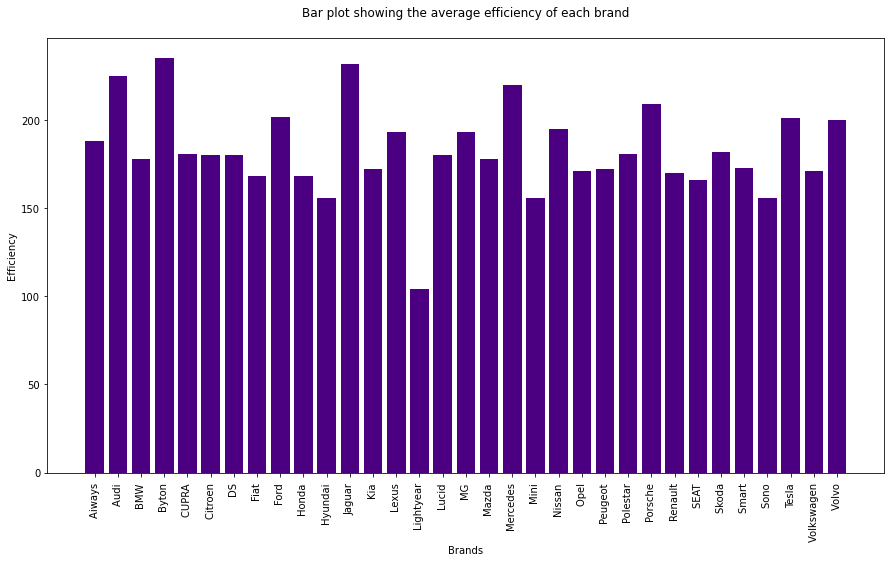

In [73]:
br_eff = list(eff_dict.keys())
eff = list(eff_dict.values())
fig = plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.xlabel('Brands')
plt.ylabel('Efficiency')
plt.title('Bar plot showing the average efficiency of each brand\n')
plt.bar(br_eff,eff, color = 'indigo')
plt.show()

In [121]:
#number of vehicles with presence/absence of RapidCharge feature grouped by brands
charge = df1.groupby('Brand')['RapidCharge'].value_counts()
print(charge)

Brand        RapidCharge
Aiways       Yes             1
Audi         Yes             9
BMW          Yes             4
Byton        Yes             3
CUPRA        Yes             1
Citroen      Yes             1
DS           Yes             1
Fiat         Yes             2
Ford         Yes             4
Honda        Yes             2
Hyundai      Yes             3
Jaguar       Yes             1
Kia          Yes             5
Lexus        Yes             1
Lightyear    Yes             1
Lucid        Yes             1
MG           Yes             1
Mazda        Yes             1
Mercedes     Yes             3
Mini         Yes             1
Nissan       Yes             8
Opel         Yes             3
Peugeot      Yes             2
Polestar     Yes             1
Porsche      Yes             5
Renault      Yes             3
             No              2
SEAT         Yes             1
Skoda        Yes             6
Smart        No              3
Sono         Yes             1
Tesla        Y

In [40]:
#Number of vehicles with presence/absence of RapidCharge feature
df1['RapidCharge'].value_counts()

Yes    98
No      5
Name: RapidCharge, dtype: int64

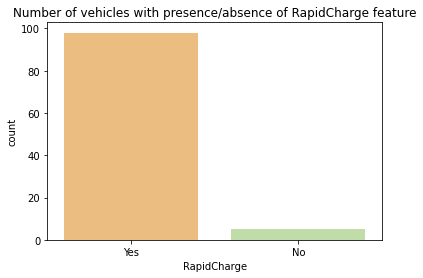

In [42]:
sn.countplot(x='RapidCharge',data=df1,palette='Spectral')
plt.title('Number of vehicles with presence/absence of RapidCharge feature')
plt.show()

#### Inference:

95% of the vehicles have got the rapid charge feature.

#### Analysis of Acceleration and top speed

In [119]:
#quickest and slowest acceleration rates
fast_accl = df1.loc[df1['Acceleration'].idxmin()]
slow_accl = df1.loc[df1['Acceleration'].idxmax()]
print('Specifications of the vehicle with the fastest 0-100 acceleration:\n')
print(fast_accl,'\n')
print('Specifications of the vehicle with the slowest 0-100 acceleration:\n')
print(slow_accl)

Specifications of the vehicle with the fastest 0-100 acceleration:

Brand               Tesla 
Model            Roadster 
Acceleration           2.1
TopSpeed               410
Range                  970
Efficiency             206
FastCharge             920
RapidCharge            Yes
PowerTrain             AWD
PlugType        Type 2 CCS
BodyStyle           Cabrio
Segment                  S
Seats                    4
PriceEuro           215000
Name: 51, dtype: object 

Specifications of the vehicle with the slowest 0-100 acceleration:

Brand                    Renault 
Model           Kangoo Maxi ZE 33
Acceleration                 22.4
TopSpeed                      130
Range                         160
Efficiency                    194
FastCharge                      -
RapidCharge                    No
PowerTrain                    FWD
PlugType                   Type 2
BodyStyle                     SPV
Segment                         N
Seats                           5
PriceEuro         

#### Inference:

Tesla Roadster has the quickest 0-100 kmph speed acceleration time of 2.1 s.

Renault Kangoo Maxi ZE 33 has the slowest 0-100 kmph speed acceleration time of 22.4 s.

In [47]:
#average acceleration of each brand
acc_dict = avg_val['Acceleration'].to_dict()
print(acc_dict)

{'Aiways ': 9.0, 'Audi ': 6.0, 'BMW ': 6.0, 'Byton ': 7.0, 'CUPRA ': 6.0, 'Citroen ': 10.0, 'DS ': 9.0, 'Fiat ': 9.0, 'Ford ': 6.0, 'Honda ': 9.0, 'Hyundai ': 9.0, 'Jaguar ': 5.0, 'Kia ': 9.0, 'Lexus ': 8.0, 'Lightyear ': 10.0, 'Lucid ': 3.0, 'MG ': 8.0, 'Mazda ': 9.0, 'Mercedes ': 7.0, 'Mini ': 7.0, 'Nissan ': 8.0, 'Opel ': 8.0, 'Peugeot ': 8.0, 'Polestar ': 5.0, 'Porsche ': 4.0, 'Renault ': 13.0, 'SEAT ': 12.0, 'Skoda ': 9.0, 'Smart ': 12.0, 'Sono ': 9.0, 'Tesla ': 4.0, 'Volkswagen ': 9.0, 'Volvo ': 5.0}


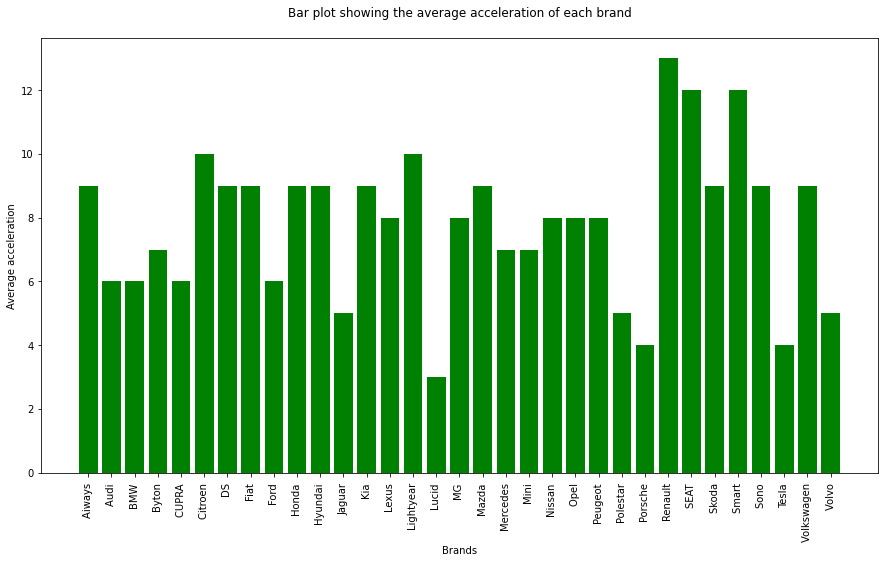

In [48]:
br = list(acc_dict.keys())
acc = list(acc_dict.values())
fig = plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.xlabel('Brands')
plt.ylabel('Average acceleration')
plt.title('Bar plot showing the average acceleration of each brand\n')
plt.bar(br,acc, color = 'green')
plt.show()

In [120]:
#highest and lowest top speed
high_speed = df1.loc[df1['TopSpeed'].idxmax()]
low_speed = df1.loc[df1['TopSpeed'].idxmin()]
print('Specifications of the vehicle with the highest top speed:\n')
print(high_speed,'\n')
print('Specifications of the vehicle with the lowest top speed:\n')
print(low_speed)

Specifications of the vehicle with the highest top speed:

Brand               Tesla 
Model            Roadster 
Acceleration           2.1
TopSpeed               410
Range                  970
Efficiency             206
FastCharge             920
RapidCharge            Yes
PowerTrain             AWD
PlugType        Type 2 CCS
BodyStyle           Cabrio
Segment                  S
Seats                    4
PriceEuro           215000
Name: 51, dtype: object 

Specifications of the vehicle with the lowest top speed:

Brand                   Nissan 
Model           e-NV200 Evalia 
Acceleration                 14
TopSpeed                    123
Range                       190
Efficiency                  200
FastCharge                  190
RapidCharge                 Yes
PowerTrain                  FWD
PlugType         Type 1 CHAdeMO
BodyStyle                   SPV
Segment                       N
Seats                         7
PriceEuro                 33246
Name: 66, dtype: object


#### Inference:

Tesla Roadster has the highest top speed of 410 KmH.

Nissan e-NV200 Evalia has the lowest top speed of 123 KmH.

In [45]:
#average top speed of each brand
speed_dict = avg_val['TopSpeed'].to_dict()
print(speed_dict)

{'Aiways ': 150.0, 'Audi ': 200.0, 'BMW ': 172.0, 'Byton ': 190.0, 'CUPRA ': 160.0, 'Citroen ': 150.0, 'DS ': 150.0, 'Fiat ': 150.0, 'Ford ': 180.0, 'Honda ': 145.0, 'Hyundai ': 162.0, 'Jaguar ': 200.0, 'Kia ': 163.0, 'Lexus ': 160.0, 'Lightyear ': 150.0, 'Lucid ': 250.0, 'MG ': 140.0, 'Mazda ': 150.0, 'Mercedes ': 173.0, 'Mini ': 150.0, 'Nissan ': 168.0, 'Opel ': 150.0, 'Peugeot ': 150.0, 'Polestar ': 210.0, 'Porsche ': 254.0, 'Renault ': 135.0, 'SEAT ': 130.0, 'Skoda ': 158.0, 'Smart ': 130.0, 'Sono ': 140.0, 'Tesla ': 244.0, 'Volkswagen ': 155.0, 'Volvo ': 180.0}


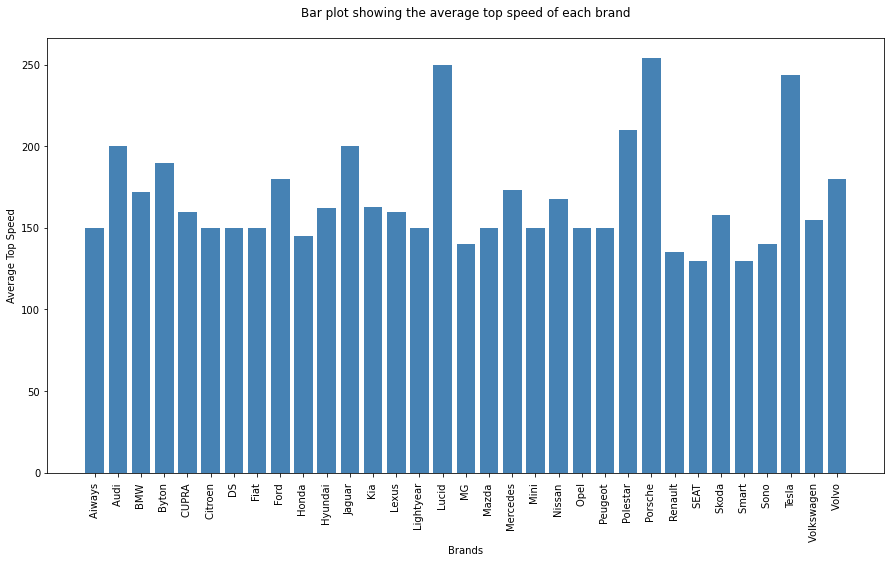

In [46]:
brands = list(speed_dict.keys())
speed = list(speed_dict.values())
fig = plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.xlabel('Brands')
plt.ylabel('Average Top Speed')
plt.title('Bar plot showing the average top speed of each brand\n')
plt.bar(brands,speed, color = 'steelblue')
plt.show()

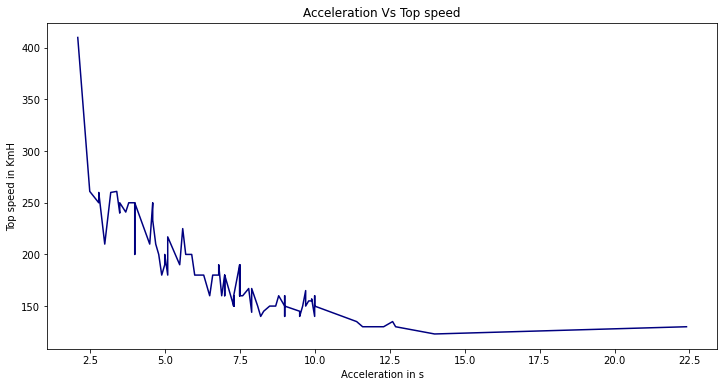

In [118]:
#Acceleration Vs Top speed
fig = plt.figure(figsize = (12, 6))
x = df1.sort_values('Acceleration')
plt.plot(x['Acceleration'],x['TopSpeed'],color='navy')
plt.title('Acceleration Vs Top speed')
plt.xlabel('Acceleration in s')
plt.ylabel('Top speed in KmH')
plt.show()

#### Inference:
    
The top speed is inversely proprotional to the acceleration.

#### Analysis of Price

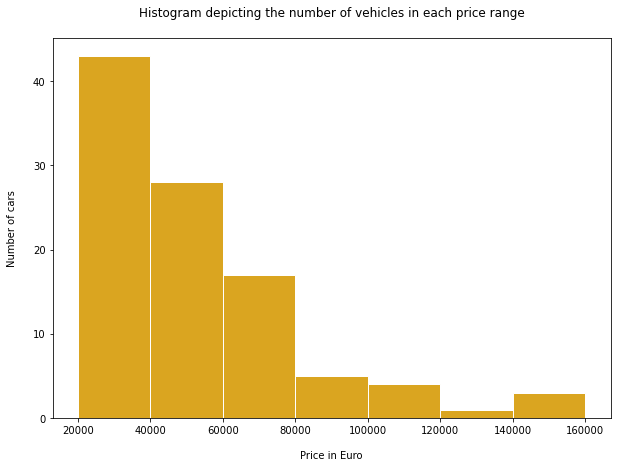

In [50]:
#number of vehicles in each price range
prices = df1['PriceEuro']
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(prices, bins = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000], color='goldenrod',edgecolor='white')
plt.title('Histogram depicting the number of vehicles in each price range\n')
plt.xlabel('\nPrice in Euro')
plt.ylabel('Number of cars\n')
plt.show()

#### Inference:

Majority of the vehicles fall under the broader price range of 20000 - 80000 Euros with a large number of vehicles falling under the range of 20000 - 40000 Euros.

In [122]:
#highest and lowest price
high_price = df1.loc[df1['PriceEuro'].idxmax()]
low_price = df1.loc[df1['PriceEuro'].idxmin()]
print('Specifications of the vehicle with the highest price:\n')
print(high_price,'\n')
print('Specifications of the vehicle with the lowest price:\n')
print(low_price)

Specifications of the vehicle with the highest price:

Brand               Tesla 
Model            Roadster 
Acceleration           2.1
TopSpeed               410
Range                  970
Efficiency             206
FastCharge             920
RapidCharge            Yes
PowerTrain             AWD
PlugType        Type 2 CCS
BodyStyle           Cabrio
Segment                  S
Seats                    4
PriceEuro           215000
Name: 51, dtype: object 

Specifications of the vehicle with the lowest price:

Brand                   SEAT 
Model           Mii Electric 
Acceleration             12.3
TopSpeed                  130
Range                     195
Efficiency                166
FastCharge                170
RapidCharge               Yes
PowerTrain                FWD
PlugType           Type 2 CCS
BodyStyle           Hatchback
Segment                     A
Seats                       4
PriceEuro               20129
Name: 44, dtype: object


#### Inference:

Tesla Roadster has the highest price of 215000 Euros.

SEAT Mii Electric  has the lowest price of 20129 Euros.

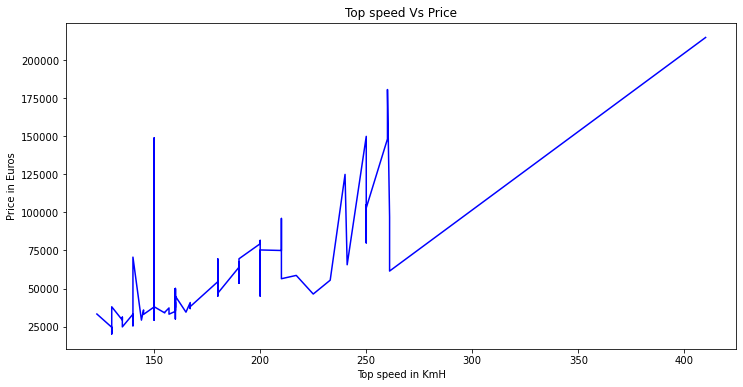

In [127]:
#Top speed Vs Price
fig = plt.figure(figsize = (12, 6))
a = df1.sort_values('TopSpeed')
plt.plot(a['TopSpeed'],a['PriceEuro'],color='blue')
plt.title('Top speed Vs Price')
plt.xlabel('Top speed in KmH')
plt.ylabel('Price in Euros')
plt.show()

#### Inference:
    
The price is directly proprotional to the top speed.

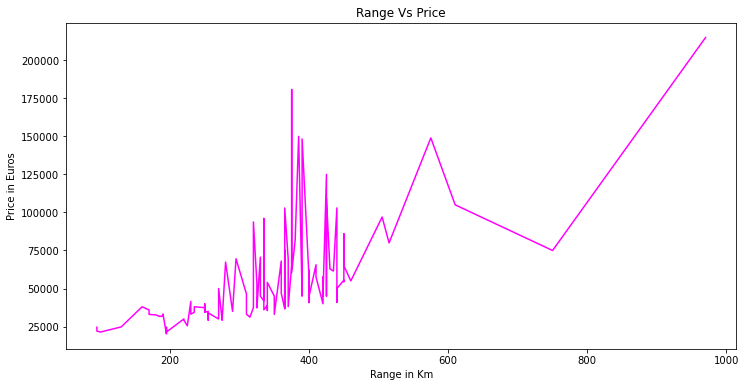

In [126]:
#Range Vs Price
fig = plt.figure(figsize = (12, 6))
b = df1.sort_values('Range')
plt.plot(b['Range'],b['PriceEuro'],color='magenta')
plt.title('Range Vs Price')
plt.xlabel('Range in Km')
plt.ylabel('Price in Euros')
plt.show()

#### Inference:
The price is directly proprotional to the range.

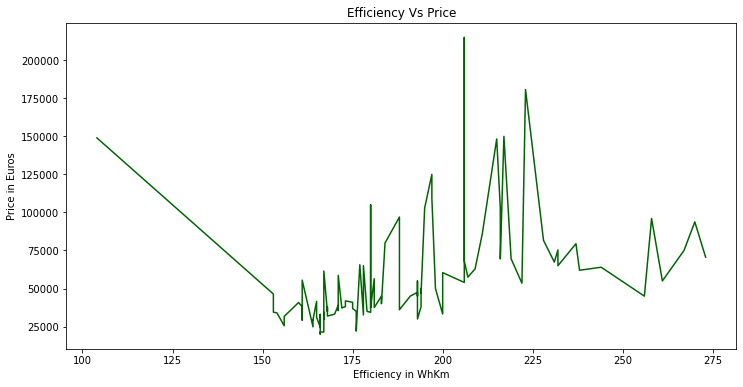

In [125]:
#Efficiency Vs Price
fig = plt.figure(figsize = (12, 6))
c = df1.sort_values('Efficiency')
plt.plot(c['Efficiency'],c['PriceEuro'],color='darkgreen')
plt.title('Efficiency Vs Price')
plt.xlabel('Efficiency in WhKm')
plt.ylabel('Price in Euros')
plt.show()

#### Inference:
The efficiency does not seem to have any relation to the price of the vehicle.

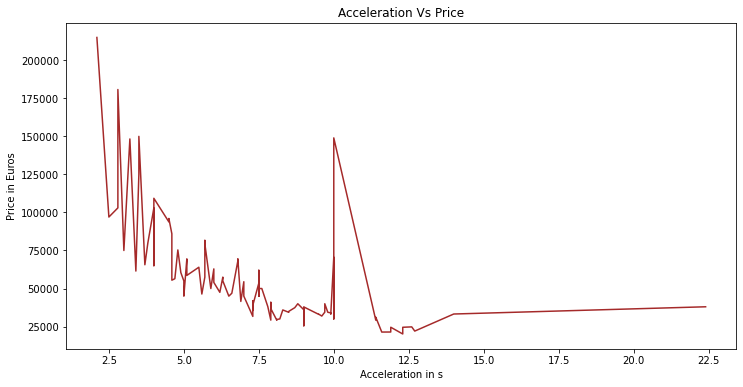

In [124]:
#Acceleration Vs Price
fig = plt.figure(figsize = (12, 6))
d = df1.sort_values('Acceleration')
plt.plot(d['Acceleration'],d['PriceEuro'],color='brown')
plt.title('Acceleration Vs Price')
plt.xlabel('Acceleration in s')
plt.ylabel('Price in Euros')
plt.show()

#### Inference:
The price is inversely proportional to the rate of acceleration.

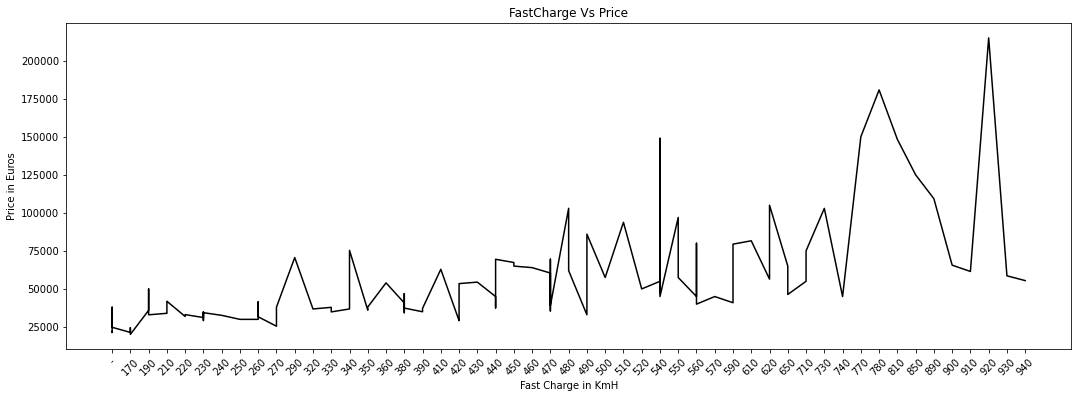

In [123]:
#FastCharge Vs Price
fig = plt.figure(figsize = (18, 6))
e = df1.sort_values('FastCharge')
plt.plot(e['FastCharge'],e['PriceEuro'],color='black')
plt.title('FastCharge Vs Price')
plt.xlabel('Fast Charge in KmH')
plt.ylabel('Price in Euros')
plt.xticks(rotation=45)
plt.show()

#### Inference:
The price is directly proportional to the fast charge.

### Analysis Results

The results of the analysis of electric vehicles have been summarized:

* Tesla has produced the most number of vehicles.
* 15 brands have produced the least number of vehicles.
* The total number of unique models available: 102
* It can be seen that almost every brand produces multiple models of electric vehicles.
* Sedan and Hatchback are the most produced vehicle styles.
* Most of the vehicles produced belong to the C segment.
* A low number of vehicles are produced in the S segment.
* Audi produces the most number of 5-seater vehicles.
* Tesla has produced 4-seater, 5-seater, 6-seater and 7-seater vehicles.
* Smart is the only brand to have produced 2-seater vehicles.
* Most brands produce 5-seater vehicles.
* A large number of vehicles belong to 'Type 2 CCS'.
* Very less number of vehicles belong to 'Type 1 CHAdeMO'
* All Wheel Drive (AWD) is the most common type of power train followed by Front Wheel Drive (FWD) and Rear Wheel Drive (RWD).
* Tesla Roadster has the highest range of 970 Km.
* Smart EQ forfour has the lowest range of 95 Km.
* Mercedes EQV 300 Long has the highest efficiency of 273.
* Lightyear One has the lowest efficiency of 104.
* 95% of the vehicles have got the rapid charge feature.
* Tesla Roadster has the quickest 0-100 kmph speed acceleration time of 2.1 s.
* Renault Kangoo Maxi ZE 33 has the slowest 0-100 kmph speed acceleration time of 22.4 s.
* Tesla Roadster has the highest top speed of 410 KmH.
* Nissan e-NV200 Evalia has the lowest top speed of 123 KmH.
* The top speed is inversely proprotional to the acceleration.
* Majority of the vehicles fall under the broader price range of 20000 - 80000 Euros with a large number of vehicles falling under the range of 20000 - 40000 Euros.
* Tesla Roadster has the highest price of 215000 Euros.
* SEAT Mii Electric has the lowest price of 20129 Euros.
* The price is directly proprotional to the top speed.
* The price is directly proprotional to the range.
* The efficiency does not seem to have any relation to the price of the vehicle.
* The price is inversely proportional to the rate of acceleration.
* The price is directly proportional to the fast charge.